In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tweet = pd.read_csv("MentalHealthTwitter.csv")
tweet.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [2]:
tweet = tweet.rename(columns = {'label':'MDD'})
tweet.info()
tweet.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  MDD           20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
MDD             0
dtype: int64

In [3]:
tweet = tweet.drop(['Unnamed: 0'], axis = 1)

In [17]:
# Change all characters in tweets to lower case
tweet["post_text"] = tweet["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
tweet["post_text"] = tweet["post_text"].str.replace("\d","")

# Remove punctuation from tweets
tweet["post_text"] = tweet["post_text"].str.replace("[^\w\s]","")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9272\1198242573.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet["post_text"] = tweet["post_text"].str.replace("\d","")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9272\1198242573.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet["post_text"] = tweet["post_text"].str.replace("[^\w\s]","")


# Find the most common weekday when depressed users tweeted

In [18]:
tweet['post_created'] = pd.to_datetime(tweet['post_created'], infer_datetime_format = True)
tweet['weekday'] = tweet['post_created'].dt.weekday 
print(tweet[['post_created', 'weekday']].dtypes)
print(tweet[['post_created', 'weekday']]) # monday = 0, sunday = 6

post_created    datetime64[ns, UTC]
weekday                       int64
dtype: object
                   post_created  weekday
0     2015-08-30 07:48:37+00:00        6
1     2015-08-30 07:31:33+00:00        6
2     2015-08-29 22:11:07+00:00        5
3     2015-08-29 18:40:49+00:00        5
4     2015-08-29 18:40:26+00:00        5
...                         ...      ...
19995 2017-01-12 00:14:56+00:00        3
19996 2017-01-12 00:06:18+00:00        3
19997 2017-01-12 00:05:42+00:00        3
19998 2017-01-12 00:05:22+00:00        3
19999 2017-01-12 00:04:47+00:00        3

[20000 rows x 2 columns]


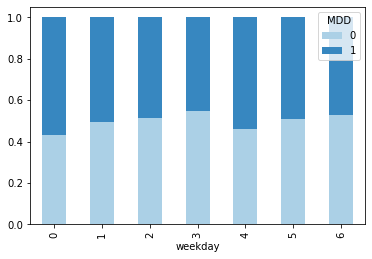

Chi-square statistic : 104.1668566812993
P-value : 3.384515441194956e-20


In [19]:
import scipy.stats as stats
weekday_MDD = tweet.groupby('weekday')['MDD'].value_counts(normalize = True)
weekday_MDD = weekday_MDD.unstack()
weekday_MDD.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 2))
plt.show()

weekday_MDD = tweet.groupby('weekday')['MDD'].value_counts(normalize = False).unstack()
chi_stat, pvalue, df, expected = stats.chi2_contingency(weekday_MDD)
print('Chi-square statistic :', chi_stat)
print('P-value :', pvalue)
#There is relationship between weekday and tweet from MDD users - pvalue 0-1 range
#For instance, the proportion of MDD tweets appears to be higher on weekdays 1 (Tuesday), 2 (Wednesday), and 5 (Saturday),
#while weekdays 3 (Thursday) and 6 (Sunday) have relatively lower proportions of MDD tweets.'
# 1 MDD tweets 
# 0 non-MDD tweets

In [ ]:
# having higher chi-square statictic interprets having strong association between categorical variable

In [55]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
tweet["post_text"] = tweet["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [61]:
def lemmatize_spacy(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return lemmatized_tokens

tweet['word'] = tweet['post_text'].apply(lemmatize_spacy)

In [62]:
tweet.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,MDD,weekday,word
0,637894677824413696,2015-08-30 07:48:37+00:00,years since diagnosed anxiety depression today...,1013187241,84,211,251,837,0,1,6,"[year, diagnose, anxiety, depression, today, m..."
1,637890384576778240,2015-08-30 07:31:33+00:00,sunday need break im planning spend little tim...,1013187241,84,211,251,837,1,1,6,"[sunday, need, break, m, plan, spend, little, ..."
2,637749345908051968,2015-08-29 22:11:07+00:00,awake tired need sleep brain ideas,1013187241,84,211,251,837,0,1,5,"[awake, tired, need, sleep, brain, idea]"
3,637696421077123073,2015-08-29 18:40:49+00:00,rt sewhq retro bears make perfect gifts great ...,1013187241,84,211,251,837,2,1,5,"[rt, sewhq, retro, bear, perfect, gift, great,..."
4,637696327485366272,2015-08-29 18:40:26+00:00,hard say whether packing lists making life eas...,1013187241,84,211,251,837,1,1,5,"[hard, pack, list, make, life, easy, reinforce..."


# Sentiment Analysis

In [63]:
!pip install textblob 
from textblob import TextBlob

In [ ]:
# TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, 
# where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, -- polarity
# and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize 
# them as depressed or non-depressed based on their sentiment scores.

In [64]:
blob_emptylist = []

for i in tweet["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [65]:
emotion = pd.DataFrame(blob_emptylist)
emotion.head()
# subjectivity is personal view based(0.5 - 1) 
# if less than 0.5 it says it is factual statements 

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [69]:
tweet = pd.concat([tweet.reset_index(drop=True), emotion], axis=1)
tweet.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,MDD,weekday,word,polarity,subjectivity
0,637894677824413696,2015-08-30 07:48:37+00:00,years since diagnosed anxiety depression today...,1013187241,84,211,251,837,0,1,6,"[year, diagnose, anxiety, depression, today, m...",0.100000,1.000000
1,637890384576778240,2015-08-30 07:31:33+00:00,sunday need break im planning spend little tim...,1013187241,84,211,251,837,1,1,6,"[sunday, need, break, m, plan, spend, little, ...",-0.093750,0.750000
2,637749345908051968,2015-08-29 22:11:07+00:00,awake tired need sleep brain ideas,1013187241,84,211,251,837,0,1,5,"[awake, tired, need, sleep, brain, idea]",-0.400000,0.700000
3,637696421077123073,2015-08-29 18:40:49+00:00,rt sewhq retro bears make perfect gifts great ...,1013187241,84,211,251,837,2,1,5,"[rt, sewhq, retro, bear, perfect, gift, great,...",0.900000,0.875000
4,637696327485366272,2015-08-29 18:40:26+00:00,hard say whether packing lists making life eas...,1013187241,84,211,251,837,1,1,5,"[hard, pack, list, make, life, easy, reinforce...",-0.045833,0.370833


In [70]:
polar = tweet[['post_text','word','polarity']]
polar.head(6)

,post_text,word,polarity
0,years since diagnosed anxiety depression today...,"[year, diagnose, anxiety, depression, today, m...",0.100000
1,sunday need break im planning spend little tim...,"[sunday, need, break, m, plan, spend, little, ...",-0.093750
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, idea]",-0.400000
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bear, perfect, gift, great,...",0.900000
4,hard say whether packing lists making life eas...,"[hard, pack, list, make, life, easy, reinforce...",-0.045833
5,making packing lists new hobby movinghouse,"[make, packing, list, new, hobby, movinghouse]",0.136364


In [71]:
# Sentiment value
polar["Sentiment"] =  np.where(polar["polarity"] >= 0 , "Positive", "Negative")
polar.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9272\432223526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polar["Sentiment"] =  np.where(polar["polarity"] >= 0 , "Positive", "Negative")


,post_text,word,polarity,Sentiment
0,years since diagnosed anxiety depression today...,"[year, diagnose, anxiety, depression, today, m...",0.100000,Positive
1,sunday need break im planning spend little tim...,"[sunday, need, break, m, plan, spend, little, ...",-0.093750,Negative
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, idea]",-0.400000,Negative
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bear, perfect, gift, great,...",0.900000,Positive
4,hard say whether packing lists making life eas...,"[hard, pack, list, make, life, easy, reinforce...",-0.045833,Negative


In [72]:
polar.groupby("polarity").max().head(5) 
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,word,Sentiment
polarity,,,
-1.000000,worst bumbling stumbling statement ive seen in...,"[worst, bumble, stumble, statement, ve, see, i...",Negative
-0.900000,sickening httpstcokoohihbrx,"[sicken, httpstcokoohihbrx]",Negative
-0.900000,keitholbermann thats one word would go traitor...,"[keitholbermann, s, word, traitor, stupid, evi...",Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,"[gop, lawmaker, ask, twitter, vote, obamacare,...",Negative
-0.857143,sick perceived anything everything im told dri...,"[sick, perceive, m, tell, drive, insane]",Negative


,post_text,word,polarity
Sentiment,,,
Negative,3517,3517,3517
Positive,16483,16483,16483


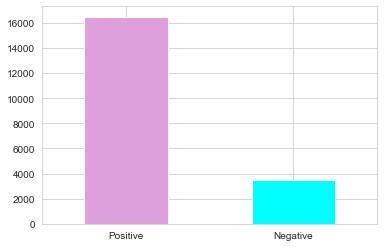

In [73]:
result = polar["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

polar.groupby("Sentiment").count()

Text(0.5, 1.0, 'Polarity Distribution')

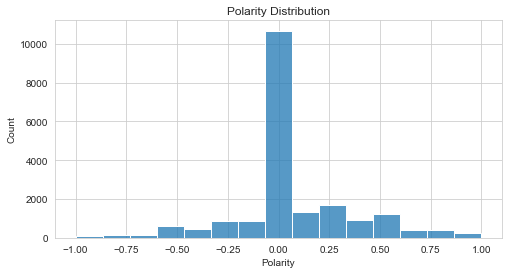

In [74]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(polar['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [76]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(polar['post_text'],polar['Sentiment'], test_size=0.2, random_state=42)

In [77]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [78]:
# Train a decision tree classifier- 
# overfitting- pruning use, regularization, hyper parameter tuning
# if not only text data how?
# tokens handle -- 
# logistic regression- binary usually, multiclass how?


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.94025


In [79]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.89      0.84       718
    Positive       0.98      0.95      0.96      3282

    accuracy                           0.94      4000
   macro avg       0.89      0.92      0.90      4000
weighted avg       0.94      0.94      0.94      4000



<AxesSubplot:>

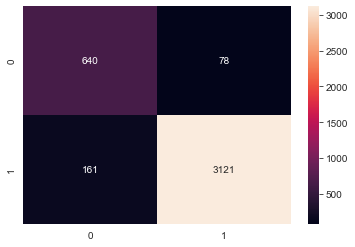

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot = True,fmt='g')

In [81]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 94.02 %
